<a href="https://colab.research.google.com/github/ye1047/DataIntensive_Car_Prediction_Project/blob/main/Progetto_Programmazione_Data_Intensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi per la predizione del prezzo di un auto usata

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Ciandrini Davide e Giorgetti Alex  
`davide.ciandrini@studio.unibo.it`  
`alex.giorgetti@studio.unibo.it`

# Parte 1 - Descrizione del problema e comprensione dei dati  
Come obiettivo ci siamo posti quello di realizzare un modello che predica il prezzo di auto usate.  
Abbiamo deciso di utilizzare un dataset presente su Kaggle al seguente [indirizzo](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho).  
Questo dataset è stato ricavato dal sito web cardekho sulla base di informazioni del 2020.


### Caricamento librerie

* Andiamo a caricare tutte le librerie necessarie per lo svolgimento del progetto

In [ ]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sb

* Questo ci permette di nascondere tutti i warning presenti durante l'esecuzione del codice.

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Caricamento dei dati

In [ ]:
file_csv_url = "https://raw.githubusercontent.com/ye1047/DataIntensive_Car_Prediction_Project/main/dataset/cars.csv"
file_name    = "cars.csv"

if not os.path.exists(file_name):
    from urllib.request import urlretrieve
    urlretrieve(file_csv_url, file_name)

In [ ]:
data = pd.read_csv(file_name, sep = ",")

In [ ]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


* Analizziamo le dimensioni in memoria, la tipologia delle feature assegnate da pandas e le istanze non nulle.

In [ ]:
data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 87.6 KB


* Come possiamo vedere `Fuel_Type`, `Seller_type` e `Trasmission` sono considerate come stringhe, ma sapendo che sono categoriche possiamo cambiare la tipologie e ricaricare il DataFrame.

In [ ]:
new_dtypes = {
    "Fuel_Type": "category",
    "Seller_Type": "category",
    "Transmission": "category"
}
data = pd.read_csv("cars.csv", dtype = new_dtypes)

* Possiamo vedere subito come l'occupazione in 
memoria è stata ridotta di oltre 50KB  
Questa scelta per Dataset come questi, non è rilevante, ma per altre molto più grandi può incidere particolarmente.

In [ ]:
data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int64   
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 33.0 KB


* Impostando a `Category` possiamo vedere subito quali sono le possibili scelte, come nel caso del `Fuel_Type`:

In [ ]:
data["Fuel_Type"].head(5)

0    Petrol
1    Diesel
2    Petrol
3    Petrol
4    Diesel
Name: Fuel_Type, dtype: category
Categories (3, object): ['CNG', 'Diesel', 'Petrol']

### Significato delle feature



* `Car_name`: Nome dell'auto
* `Year`: Anno di produzione
* `Selling_Price` : Prezzo richiesto dal venditore
* `Present_Price` : Prezzo di listino
* `Kms_Driven` : Km percorsi dall'auto
* `Fuel_Type` : Tipologia di carburante
* `Seller_Type` : Tipologia di venditore
* `Transmission` : Tipologia di cambio
* `Owner` : Numero di possessori

Le tipologie di dati presenti sono:

* Numeri interi per l'anno, il kilometraggio e possessore
* Numeri non interi per il prezzo
* String per il nome
* Categorici i restanti

### Analisi delle singole feature

In [ ]:
data.describe(include = "all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


* Grazie al metodo describe riusciamo a ottenere varie statistiche che ci possono aiutare ad analizzare il nostro Dataset.

* Come prima cosa possiamo vedere come l'Owner è tendente allo 0, questo ci fa capire come la maggior parte delle macchine ha avuto un solo proprietario.

* A seguire analizziamo la differenza tra Selling e Present medio, vedendo come si distacchi la media di circa 3.0.
Nonostante si abbia un prezzo medio relativamente basso abbiamo picchi di massimo molto più alti, fino a 35.0

* Vediamo inoltre come quasi l'80% delle auto ha come carburante il Petrolio e come cambio quello Manuale.

* Infine è bene notare che oltre il 60% delle automobili venga venduta da concessionari.

In [ ]:
def numerical_graph():
  fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("Selling Price", "Present Price", "KMs", "Year"))

  fig.add_trace(go.Histogram(x = data["Selling_Price"], name = "Selling Cost"), row = 1, col = 1)
  fig.add_trace(go.Histogram(x = data["Present_Price"], name = "Present Cost"), row = 1, col = 2)
  fig.add_trace(go.Histogram(x = data["Kms_Driven"], name = "Kms"), row = 2, col = 1)
  fig.add_trace(go.Histogram(x = data["Year"], name = "Days"), row = 2, col = 2)
  fig.show()

* Qui di seguito sono riportati 4 istogrammi che analizzano la densità di frequenza, rispettivamente di `Selling Price`, `Present Price`, `KMs` e `Years`.  

In [ ]:
numerical_graph()

* Si può notare che le prime tre le distribuzioni decrescono con l'aumentare dei valori, mentre per l'anno possiamo notare che più aumenta e più macchine risultano vendute.  
Questo ci fa capire che c'è una prevalenza di mercato sulle macchine nuove rispetto a macchine di parecchi anni fa.

In [ ]:
def category_graph():
  fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("Fuel Type", "Seller Type", "Transmission", "Owner"))

  fig.add_trace(go.Histogram(x = data["Fuel_Type"], name = "Fuel"), row = 1, col = 1)
  fig.add_trace(go.Histogram(x = data["Seller_Type"], name = "Seller"), row = 1, col = 2)
  fig.add_trace(go.Histogram(x = data["Transmission"], name = "Transmission"), row = 2, col = 1)
  fig.add_trace(go.Histogram(x = data["Owner"], name = "Owner"), row = 2, col = 2)
  fig.show()

* Qui di seguito invece sono riportati 4 istogrammi che analizzano la densità di frequenza, rispettivamente di `Fuel Type`, `Seller Type`, `Transmission` e `Owner`.  

In [ ]:
category_graph()

*   Per la tipologia di carburante abbiamo solo 2 casi di CNG e dunque possiamo eliminare quelle due auto dal DataFrame dato che l'incidenza non sarebbe rilevante.
*   Gran parte delle auto si avvicinano sia per Venditore che Cambio
*   L'Owner essendo praticamente sempre sullo 0 anche in questo caso, ci fa pensare che non potrà incidere particolarmente sulla predizione del Selling Price.



Rimuoviamo quindi le auto con carburante CNG.

In [ ]:
data = data[data['Fuel_Type'] != "CNG"]

### Esplorazione e analisi delle correlazioni tra feature

A questo punto vediamo i grafici di dispersione di Selling Price e Present Price sulla base delle feature categoriche, in questo caso la tipologia di cambio (Manuale o Automatico), la tipologia di carburante (Diesel o Petrol) e la tipologia di venditore (Privato o Concessionaria).

In [ ]:
def create_plot(first, second, value):
  time_colors = {first: "red", second: "blue"}
  p = data.plot.scatter("Present_Price",
                    "Selling_Price",
                    c = data[value].map(time_colors));
  return p

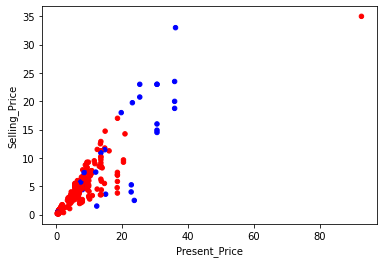

In [ ]:
create_plot("Manual", "Automatic", "Transmission")

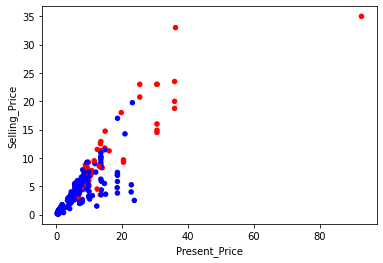

In [ ]:
create_plot("Diesel", "Petrol", "Fuel_Type")

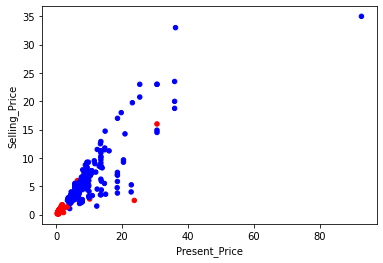

In [ ]:
create_plot("Individual", "Dealer", "Seller_Type")

In conclusione all'analisi dei grafici possiamo vedere che:

* Le macchine con un prezzo tendenzialmente più alto sono vendute da un concessionario, hanno come carburante il Diesel e come cambio Automatico.

* Le macchine con un prezzo tendenzialmente più basso sono vendute da un privato, hanno come carburante il Benzina e come cambio Manuale.


# Parte 2 - Preparazione del modello

In questa fase il nostro obiettivo è quello di riorganizzare il Dataset, eliminare le parti non necessarie e poi creare Training e Validation set. Successivamente studieremo la correlazione tra variabili.

### Riorganizzazione dei dati

* Come vediamo la colonna dei nomi delle automobili non è necessaria, ma per eventuali modifiche, creiamo un vettore corrispondente agli indici del nostro Dataset, con il quale sarà poi possibile ricavare i nomi in un secondo momento.

In [ ]:
car_names = data["Car_Name"]
data = data.drop(columns = "Car_Name")

*   Dato che l'anno dell'automobile non è generalizzato, modifichiamo quest'ultimo aggiungendo l'età rispettiva.


In [ ]:
data["Car_Age"] = 2021 - data["Year"] 
data = data.drop(columns = "Year")

* Per convertire tutte le colonne categoriche usiamo una funzione di pandas `get_dummies` che ci permette di suddividerle in diverse colonne facilitandoci la fase di correlazione.

In [ ]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


* Da questa tabella possiamo studiare la correlazione tra tutte le feature presenti nel nostro Dataset. Possiamo subito notare come il prezzo di Vendita che il prezzo di Listino siano i più correlati. A seguire anche la correlazione con Diesel risulta essere superiore alla media.

In [ ]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.879131,0.029546,-0.088741,-0.236047,0.551948,-0.551948,-0.553425,-0.366627
Present_Price,0.879131,1.000000,0.203665,0.007895,0.047172,0.473300,-0.473300,-0.513733,-0.348576
Kms_Driven,0.029546,0.203665,1.000000,0.089417,0.524285,0.173191,-0.173191,-0.100885,-0.163016
Owner,-0.088741,0.007895,0.089417,1.000000,0.182697,-0.054102,0.054102,0.123646,-0.049889
Car_Age,-0.236047,0.047172,0.524285,0.182697,1.000000,-0.063754,0.063754,0.041116,-0.000966
Fuel_Type_Diesel,0.551948,0.473300,0.173191,-0.054102,-0.063754,1.000000,-1.000000,-0.353865,-0.097468
Fuel_Type_Petrol,-0.551948,-0.473300,-0.173191,0.054102,0.063754,-1.000000,1.000000,0.353865,0.097468
Seller_Type_Individual,-0.553425,-0.513733,-0.100885,0.123646,0.041116,-0.353865,0.353865,1.000000,0.065323
Transmission_Manual,-0.366627,-0.348576,-0.163016,-0.049889,-0.000966,-0.097468,0.097468,0.065323,1.000000


### Validation set

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

* Creiamo una funziona che ci aiuterà per determinare quale modello ci aiuta maggiormente per la pedizione della nostra y

In [ ]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

* Dividiamo in due parti il nostro Dataset per gestire la parte di Validation e Training. Dato che il nostro obiettivo è stimare il `Selling_Price` andremo a creare X e y in questo modo:
---
* **X**: Conterrà tutte le feature eccetto la `Selling_Price`
* **y**: Conterrà solamente la colonna del `Selling_Price`
---
* Per fare questa operazione utilizziamo il metodo `Hold-out`. La valutazione può dipendere fortemente da quali dati finiscono nel set di addestramento e quali finiscono nel set di test, e quindi può essere significativamente diversa a seconda di come viene fatta la divisione.

In [ ]:
y = data["Selling_Price"]
X = data.drop(columns = "Selling_Price")

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y, 
    test_size = 0.2, #Possiamo variare tra 0.2 e 0.3
    random_state = 42
)

* Qui vediamo com'è stato diviso il nostro Dataset:

In [ ]:
print(f"Training set:  {X_train.shape}\nValidation set:  {X_val.shape}")

Training set:  (239, 8)
Validation set:  (60, 8)


### Creazione e analisi di modelli di Regressione

* Il nostro obiettivo è quello di creare un modello che ci permetta di stimare il prezzo di vendita di un Automobile. Studiamo e testiamo diversi modelli finchè non troviamo quello che faccia al caso nostro.
* Come primo modello iniziamo con una **Regressione Lineare** semplice:

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print_eval(X_val, y_val, lrm)

   Mean squared error: 13.06
       Relative error: 214.08918%
R-squared coefficient: 0.63086


In [ ]:
pd.Series(lrm.coef_, index = X_train.columns)

Present_Price             0.600259
Kms_Driven               -0.000024
Owner                    -1.094918
Car_Age                  -0.267790
Fuel_Type_Diesel          0.759270
Fuel_Type_Petrol         -0.759270
Seller_Type_Individual   -0.249847
Transmission_Manual      -0.809224
dtype: float64

* Da qui possiamo osservare come sia il Present Price che il carburante di tipo Diesel incidano particolarmente sulla previsione dei nuovi dati. Questo tipo di andamento era già stato notato con la tabella di correllazione.  
* Cerchiamo dunque di migliorare il modello utilizzando una regolarizzazione L2, chiamata **Regressione Ridge**.

In [ ]:
for i in [0.01, 0.1, 1.0]:
  model_b = Ridge(alpha = i)
  model_b.fit(X_train, y_train)
  print(f'Alpha {i}\n')
  print_eval(X_val, y_val, model_b)
  print('\n')

Alpha 0.01

   Mean squared error: 13.061
       Relative error: 214.10217%
R-squared coefficient: 0.63083


Alpha 0.1

   Mean squared error: 13.069
       Relative error: 214.21817%
R-squared coefficient: 0.63062


Alpha 1.0

   Mean squared error: 13.143
       Relative error: 215.29975%
R-squared coefficient: 0.62852




* Analizziamo con 3 differenti valori di alpha e vediamo che in tutti e tre i casi il nostro score si abbassa.

### Standardizzazione

* Vedendo l'andamento dei due casi precedenti proviamo a standardizzare i nostri dati per migliorare il modello. Adottiamo un metodo di regolarizzazione L1.  
* La **Regressione Lasso** è basata sulla minimizzazione della funzione d'errore.  
Come per il caso precedente, alpha, determina il peso della regolarizzazione.

In [ ]:
for i in [0.01, 0.1, 1.0]:
  std_lasso_model = Pipeline([
    ("scale", StandardScaler()),
    ("regr", Lasso(alpha = i))
  ])

  std_lasso_model.fit(X_train, y_train)
  print(f'Alpha {i}\n')
  print_eval(X_val, y_val, std_lasso_model)
  print('\n')
  print(pd.Series(std_lasso_model.named_steps["regr"].coef_, index = X.columns))
  print('\n')

Alpha 0.01

   Mean squared error: 12.918
       Relative error: 211.35184%
R-squared coefficient: 0.63487


Present_Price             4.057043e+00
Kms_Driven               -6.417472e-01
Owner                    -2.802935e-01
Car_Age                  -7.655447e-01
Fuel_Type_Diesel          5.796293e-01
Fuel_Type_Petrol         -1.549667e-15
Seller_Type_Individual   -1.129985e-01
Transmission_Manual      -2.635183e-01
dtype: float64


Alpha 0.1

   Mean squared error: 11.752
       Relative error: 187.90027%
R-squared coefficient: 0.66784


Present_Price             4.030387e+00
Kms_Driven               -5.150193e-01
Owner                    -2.141841e-01
Car_Age                  -7.841287e-01
Fuel_Type_Diesel          4.996070e-01
Fuel_Type_Petrol         -9.067596e-16
Seller_Type_Individual   -5.437854e-02
Transmission_Manual      -1.887520e-01
dtype: float64


Alpha 1.0

   Mean squared error: 6.3839
       Relative error: 94.10376%
R-squared coefficient: 0.81956


Present_Price     

* In questo caso invece, vediamo fin da subito come all'aumentare di Alpha riusciamo ad ottenere un coefficiente R^2 decisamente migliore, confermando la feature `Present_Price` più decisiva.

# Parte 3 - Studio con Grid Search e Nested cross validation

Con la cross validation andiamo a valutare un modetto su dati diversi rispetto a come è addestrato. Lavora su due processi, uno interno per trovare gli iperparametri migliori ed uno esterno per stimare l'accuratezza media dei dati.
Fin'ora abbiamo usato il metodo `hold-out`, adesso andiamo ad utilizzare il metodo di `Nested K-fold` per avere una validazione più accurata. Tramite la `Grid Search` generiamo poi N modelli differenti per stimare gli iperparametri e calcolare l'effettiva accuratezza dei modelli.

### Importazioni delle librerie

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA

import xgboost as xgb
import seaborn as sns

### Definizione dello studio Nested

* Definiamo un metodo che ci aiuti con la realizzazione una di una funzione che ci permetta di eseguire la nested cross validation.  
Per ogni GS andiamo a salvarci lo score e successivamente torniamo il modello con il rispettivo score migliore.  
Ci troveremo poi un dict con tutti i modelli studiati e il loro score.

In [ ]:
models = {}

outer_cv = KFold(3, shuffle=True, random_state=42)
inner_cv = KFold(5, shuffle=True, random_state=42)

def nested_cv(model, grid):
    results = {}
    for train_indices, val_indices in outer_cv.split(X, y):
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
        gs = GridSearchCV(model, grid, cv = inner_cv, refit = True)
        gs.fit(X_train, y_train)
        score = gs.score(X_val, y_val)
        results.update({score:gs})

        print(f"Score: {format(score)}")

    final_score = max(results.keys())
    return results[final_score], final_score

* Adesso cerchiamo i parametri ottimi utilizzando gli stessi modelli analizzati sopra utilizzando una GridSearch

### Lasso

* La regressione lasso consiste nella regressione lineare con regolarizzazione L1, basata quindi sul minimizzare la funzione d'errore. Il parametro alpha controlla il peso della regolarizzazione, andiamo infatti a studiare il modello sulla base di 4 possibili alpha.

In [ ]:
lasso_model = Pipeline([
    ("poly", PolynomialFeatures(include_bias = False)),
    ("std", StandardScaler()),
    ("regr", Lasso())
])

grid = {
    "poly__degree": [2, 3],
    "regr__alpha": [0.01, 0.1, 1, 10]
}

mdl, score = nested_cv(lasso_model, grid)
models["Lasso"] = {"Model": mdl, "Score": score}

Score: 0.9480423187280278
Score: 0.9357238617048166
Score: 0.8833103082596883


### Ridge

* La regressione Ridge, a differenza della Lasso, consiste nella regressione lineare con regolarizzazione L2. In questo modo parametri molto alti in valore assoluto sono molto penalizzati. Anche per questo modello andiamo a studiare diversi alpha.

In [ ]:
ridge_model = Pipeline([
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("scale", StandardScaler()),
    ("regr",  Ridge())
])

grid = {
    "poly__degree": [2, 3],      
    "regr__alpha":  [0.1, 1, 10]
}

mdl, score = nested_cv(ridge_model, grid)
models["Ridge"] = {"Model": mdl, "Score": score}

Score: 0.8741752780202575
Score: 0.9393047174910334
Score: 0.9665859671744659


### Elastic Net

* Dopo aver testate Ridge e Lasso in maniera seperata con questo metodo andiamo ad unire le due regressioni L2 e L1. Con alpha definiamo il peso generale mentre con l1_ratio il peso di L1 relativo al totale.

In [ ]:
elastic_model = Pipeline([
    ("poly", PolynomialFeatures(include_bias = False)),
    ("std", StandardScaler()),
    ("regr", ElasticNet())
])

grid = {
    "poly__degree": [2, 3],
    "regr__alpha": [0.1, 1, 10],
    "regr__l1_ratio": [0.1, 0.25, 0.5]
}

mdl, score = nested_cv(elastic_model, grid)
models["Elastic_Net"] = {"Model": mdl, "Score": score}

Score: -1.1007246158654826
Score: 0.9192083154919127
Score: 0.6461539596626545


### XGBoost

* Questa tipologia di algoritmo ci permette di prevedere con precisione una variabili di destinazione combinando le stime di un insieme di modelli più semplici e deboli. XGBoost riduce al minimo una funzione oggettiva regolarizzata (L1 e L2) che combina una funzione di perdita convessa e un termine di penalità della complessità del modello

In [ ]:
xgb_model = Pipeline([
    ("Scale", StandardScaler()),
    ("PCA", PCA()),
    ("regr", xgb.XGBRegressor(objective ='reg:squarederror'))
])

grid = {
    'PCA__n_components': [5],
    'regr__n_estimators': [1000],
    'regr__max_depth': [3],
    'regr__alpha': [0.1, 1, 10],
    'regr__lambda': [0.1]
}

mdl, score = nested_cv(xgb_model, grid)
models["XGBoost"] = {"Model": mdl, "Score": score}

Score: 0.8057702821875574
Score: 0.9151423128549061
Score: 0.9139021438276191


### Risultati

* Controlliamo i risultati migliori per tutti i modelli studiati:

In [ ]:
for model in models:
  print(f"{model}:\n\t\t{models[model]['Score']}")

Lasso:
		0.9480423187280278
Ridge:
		0.9665859671744659
Elastic_Net:
		0.9192083154919127
XGBoost:
		0.9151423128549061


# Parte 4 - Valutazione dei modelli studiati

A questo punto andiamo a valutare con più attenzione i modelli che abbiamo individuato. Utilizziamo la funzione precedentemente definita `print_val` la quale ci tornerà per ogni modello addestrato i suoi: 
* Errore quadratico medio
* Errore relativo
* Coefficiente R^2




### Accuratezza e validazione

In [ ]:
for model in models:
  print(f"{model} model:\n-----------------------")
  print_eval(X_val, y_val, models[model]["Model"])
  print("-----------------------\n")

Lasso model:
-----------------------
   Mean squared error: 1.5866
       Relative error: 40.00987%
R-squared coefficient: 0.95515
-----------------------

Ridge model:
-----------------------
   Mean squared error: 0.39058
       Relative error: 19.89680%
R-squared coefficient: 0.98896
-----------------------

Elastic_Net model:
-----------------------
   Mean squared error: 1.1706
       Relative error: 44.39345%
R-squared coefficient: 0.96691
-----------------------

XGBoost model:
-----------------------
   Mean squared error: 0.00011913
       Relative error: 0.73640%
R-squared coefficient: 1.0
-----------------------



* Vediamo come i modelli sono molto simili tra loro, il **Ridge** supera di accuratezza il **Lasso** e l'**Elastic net** come appurato precedentemente. Ma abbiamo una precissisima previsione con il modello di **XGBoost**.  
* Definiamo dunque una funzione che ci permette di stampare, dato il nome del modello, l'andamento della predizione confrontando due grafici: *Histplot* e *Scatter*

### Grafico delle predizione

In [ ]:
for model in models:
  models[model]["Predict"] = models[model]["Model"].predict(X_val)

def final_graph(model_name):
  fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
  
  fig.suptitle("Lasso graph", fontsize = 25)
  
  sns.histplot(y_val - models[model_name]["Predict"], ax = axes[0], kde = True, element = "poly")
  axes[1].scatter(y_val, models[model_name]["Predict"])

  axes[0].set_title(f"{model_name} Histplot")
  axes[1].set_title(f"{model_name} Scatter")

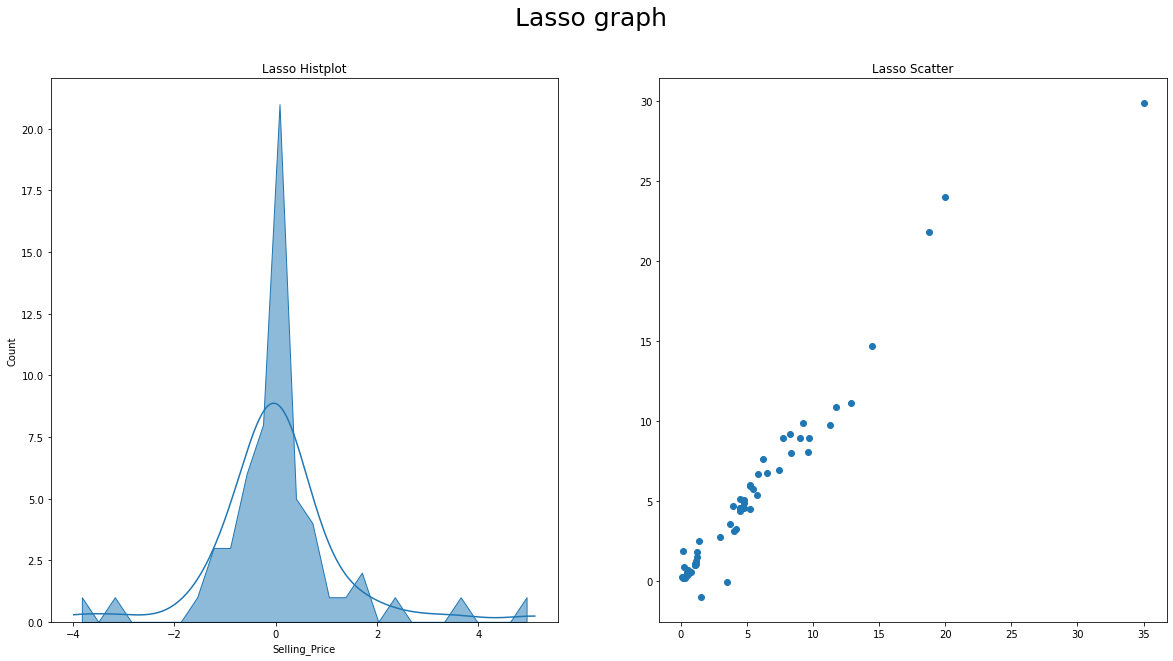

In [ ]:
final_graph("Lasso")

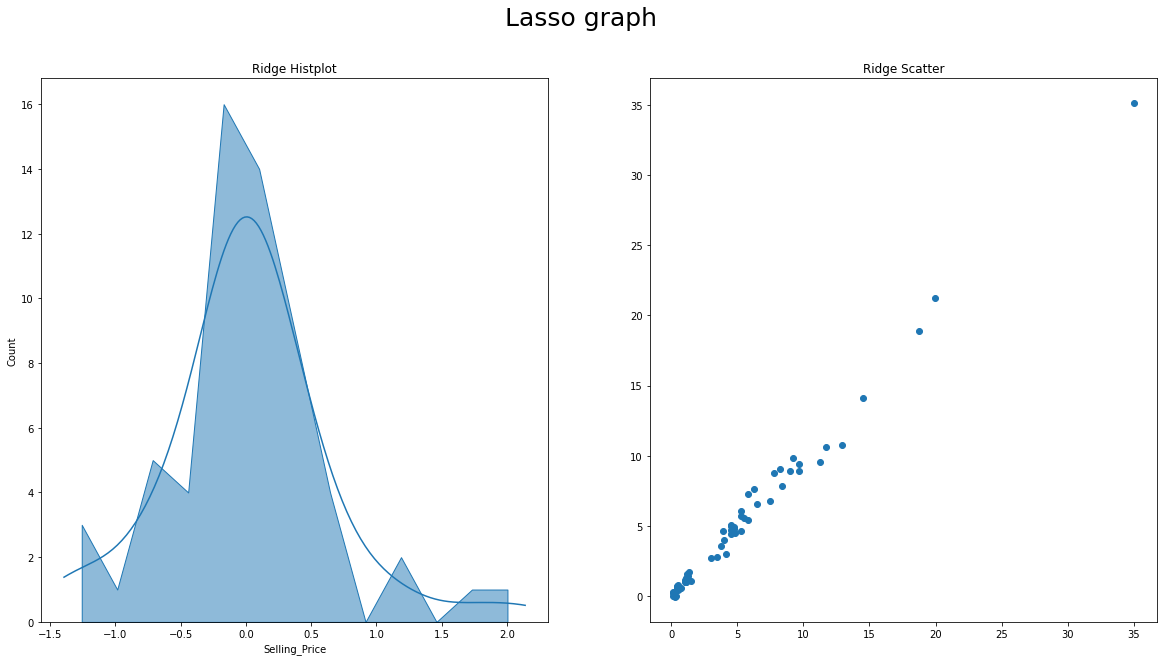

In [ ]:
final_graph("Ridge")

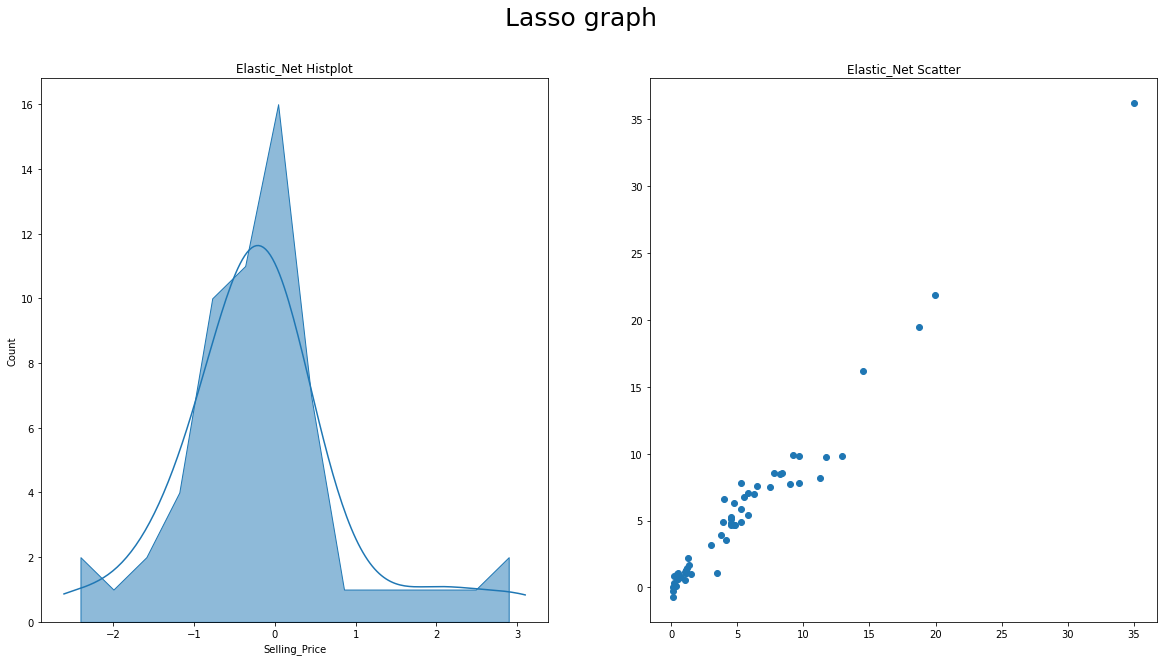

In [ ]:
final_graph("Elastic_Net")

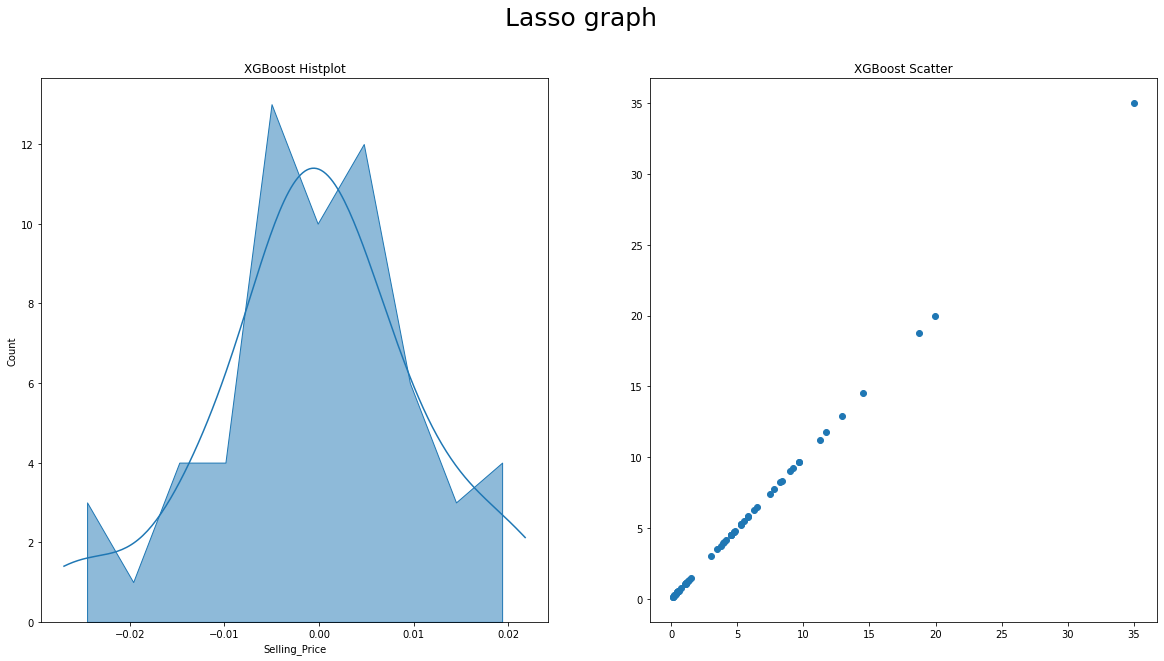

In [ ]:
final_graph("XGBoost")

# Parte 5 - Analisi conclusiva  
Come fase conclusiva andiamo a stampare per ogni modello la predizione delle automobili presenti nel nostro set di Validation. Vediamo per ognuna il distaccamento dal valore reale, traendo le conclusioni sul modello migliore.

In [ ]:
data = {'Selling Prices':         y_val.head(15),
        'XGBoost_Prediction':     models["XGBoost"]["Model"].predict(X_val)[:15],
        'Lasso_Prediction':       models["Lasso"]["Model"].predict(X_val)[:15],
        'Ridge_Prediction':       models["Ridge"]["Model"].predict(X_val)[:15],
        'ElasticNet_Prediction':  models["Elastic_Net"]["Model"].predict(X_val)[:15],
        'Car_Name':               car_names[y_val.head(15).index]
}

pd.DataFrame(data).sort_index()

,Selling Prices,XGBoost_Prediction,Lasso_Prediction,Ridge_Prediction,ElasticNet_Prediction,Car_Name
5,9.25,9.249281,9.872710,9.836662,9.880587,vitara brezza
9,7.45,7.431100,6.942149,6.791941,7.469575,ciaz
59,19.99,19.992527,23.980674,21.228615,21.821440,fortuner
79,14.50,14.513296,14.680132,14.090274,16.163223,fortuner
95,5.85,5.852381,6.680513,7.242625,7.088878,corolla altis
99,9.65,9.648474,8.084605,9.409883,9.802041,fortuner
111,1.15,1.138304,1.236572,1.324835,1.302149,Royal Enfield Thunder 350
156,0.48,0.464438,0.387538,0.714636,1.033643,TVS Sport
166,0.45,0.460858,0.392039,0.654478,0.845466,Hero Passion Pro
175,0.38,0.375909,0.307899,0.014015,0.118334,Hero Honda CBZ extreme


Verifichiamo dalla tabella come le previsioni effettuate non si discostano più di tanto dal valore reale, ponendo particolare attenzione a una previsione molto accurata con il modello **XGBoost**. Siamo particolarmente soddisfatti del risultato ottenuto, poichè non ci aspettavamo una tale soluzione, probabilmente data dalle dimensioni ridotte del Dataset utilizzato (300 istanze)